# Exploratory Data Analysis
### Jeff Ho

This notebook shows ingesting, cleaning, and understanding the data for this challenge.

**Question:**
Can we design and execute a method to predict the cuisine of a recipe given only its ingredients?

**Deliverables:**
Produce guidelines for a team to hand label cuisines based on ingredients.

**Why?**
To improve the product by building a feature for the food publication that enables users to query by cuisine.

In [107]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
# load data
raw_df = pd.read_json('recipies.json')
raw_df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


### Basic questions about the data

In [66]:
# How many recipes are there?
print(len(raw_df['cuisine']))

39774


In [67]:
# Why are there so many recipes? The prompt said about 10,000. Are some rows empty?
raw_df.sample(50) # Doesn't look like it based on random sample below (run multiple times). 

,id,cuisine,ingredients
12210,39395,chinese,"[fresh ginger, peanut oil, light soy sauce, se..."
10361,38724,russian,"[water, beets, cabbage, tomato purée, potatoes..."
25436,1726,japanese,"[fresh cilantro, tahini, soba noodles, soy sau..."
4229,43288,italian,"[eggs, peperoncino, country style bread, porci..."
25831,10991,mexican,"[jicama, red bell pepper, orange, purple onion..."
27115,48101,mexican,"[kosher salt, Mexican cheese blend, whole whea..."
9540,31084,chinese,"[soy sauce, mushrooms, non stick spray, fresh ..."
25180,2671,british,"[sugar, unsalted butter, salt, eggs, milk, whi..."
29259,7155,mexican,"[shredded cheddar cheese, fat skimmed chicken ..."
8723,45429,mexican,"[purple onion, hellmann' or best food light ma..."


In [68]:
# Are there duplicate ids?
raw_df['id'].value_counts()

# Nope. It's possible there is just more data than expected.

2047     1
11663    1
44447    1
42398    1
48541    1
        ..
29339    1
31386    1
25241    1
27288    1
0        1
Name: id, Length: 39774, dtype: int64

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

20

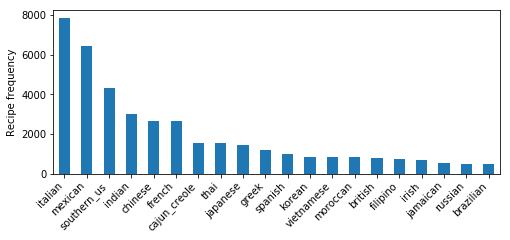

['italian', 'mexican', 'southern_us', 'indian', 'chinese', 'french', 'cajun_creole', 'thai', 'japanese', 'greek', 'spanish', 'korean', 'vietnamese', 'moroccan', 'british', 'filipino', 'irish', 'jamaican', 'russian', 'brazilian']


In [119]:
# How many cuisines?
display(raw_df['cuisine'].value_counts()) #Mostly Italian, Mexican, and Southern.
display(len(raw_df['cuisine'].value_counts())) #20 cuisines.

fig,ax = plt.subplots(figsize=(8,3))
raw_df['cuisine'].value_counts().plot(ax=ax,kind='bar')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Recipe frequency')
plt.show()

cuisine_list = list(raw_df['cuisine'].value_counts().index.values)
print(cuisine_list)

In [70]:
# How many unique ingredients per recipe? How many ingredients total? 

# First need to unpack the ingredients column. get new rows for each ingredient.
df = raw_df.explode('ingredients')
display(df.head(5))

# Get total number of ingredients and frequencies
display(pd.DataFrame(df['ingredients'].value_counts()))
#6714 ingredients, most common is salt, in almost 50% of all recipes (~18000 vs ~39000 total).

# Then count ingredients by recipe id.
display(df[['id','ingredients']].groupby('id').count().describe())
# num_ingredients ranges from 1-65! mean ~10

,id,cuisine,ingredients
0,10259,greek,romaine lettuce
0,10259,greek,black olives
0,10259,greek,grape tomatoes
0,10259,greek,garlic
0,10259,greek,pepper


,ingredients
salt,18049
onions,7972
olive oil,7972
water,7457
garlic,7380
...,...
carbonated beverages,1
yellowtail snapper fillets,1
boneless moulard duck breast halves,1
yoghurt natural low fat,1


,ingredients
count,39774.000000
mean,10.767713
std,4.428978
min,1.000000
25%,8.000000
50%,10.000000
75%,13.000000
max,65.000000


In [123]:
# What is with that maximum ingredient recipe?
recipes_by_num_ingredients = df[['id','ingredients']].groupby('id').count().sort_values(by='ingredients',ascending=False)
display(recipes_by_num_ingredients)

recipe_id_with_max_ingredients = recipes_by_num_ingredients.index[0]
#look at the ingredients for the 
print(sorted(raw_df.loc[raw_df['id']==recipe_id_with_max_ingredients,'ingredients'].values[0]))

# A ton of duplicates (e.g., 'chicken cutlet','boneless skinless chicken breast halves', 'boneless skinless chicken breasts',)
# Also 'garlic', 'garlic cloves'
# Also 'soba' for some reason?

,ingredients
id,
3885,65
13430,59
13049,52
49282,49
2253,49
...,...
29849,1
35028,1
32772,1


['Alfredo sauce', 'Neufchâtel', 'all-purpose flour', 'basil dried leaves', 'basil leaves', 'boneless skinless chicken breast halves', 'boneless skinless chicken breasts', 'butter', 'cajun seasoning', 'cayenne pepper', 'chicken cutlets', 'cilantro leaves', 'coarse salt', 'cooked chicken', 'crushed red pepper', 'diced tomatoes', 'dried parsley', 'extra-virgin olive oil', 'fettucine', 'flour', 'fresh basil', 'fresh ginger', 'fresh leav spinach', 'fresh marjoram', 'fresh parsley', 'freshly ground pepper', 'frozen artichoke hearts', 'garlic', 'garlic cloves', 'garlic powder', 'grated parmesan cheese', 'green pepper', 'ground black pepper', 'ground pepper', 'kosher salt', 'large eggs', 'lemon', 'milk', 'minced garlic', 'multi-grain penne pasta', 'olive oil', 'onion powder', 'orzo', 'panko breadcrumbs', 'parmigiano reggiano cheese', 'part-skim mozzarella cheese', 'pasta sauce', 'penne', 'pepper', 'plum tomatoes', 'red bell pepper', 'red pepper flakes', 'red wine vinegar', 'rice vinegar', 'sal

In [125]:
# What is the minimum ingredient recipe?
recipe_id_with_min_ingredients = recipes_by_num_ingredients.index[-1]
#look at the ingredients for the 
print(sorted(raw_df.loc[raw_df['id']==recipe_id_with_min_ingredients,'ingredients'].values[0]))

['spanish chorizo']


,Mean,Std Dev
cuisine,,
irish,9.299850,3.700505
brazilian,9.520343,5.555139
southern_us,9.634954,3.869404
british,9.708955,4.165011
japanese,9.735067,4.245882
french,9.817838,4.144744
italian,9.909033,3.806708
filipino,10.000000,3.855135
greek,10.182128,3.729461


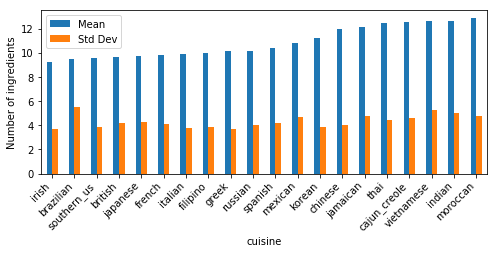

In [136]:
# How many ingredients by cuisine?

# Count ingredients by cuisine recipe
def print_ingredients_stats(df):
    display(df[['id','ingredients']].groupby('id').count()
                .describe().loc[['mean','std','min','25%','50%','75%','max']])
    
def get_mean_ingredients(df):
    return df[['id','ingredients']].groupby('id').count().mean()

def get_std_ingredients(df):
    return df[['id','ingredients']].groupby('id').count().std()
    
mean_ingredients_by_cuisine = df.groupby('cuisine').agg(get_mean_ingredients)\
                                .sort_values('ingredients')
mean_ingredients_by_cuisine.drop('id',axis=1,inplace=True)
std_ingredients_by_cuisine = df.groupby('cuisine').agg(get_std_ingredients)\
                                .sort_values('ingredients')
std_ingredients_by_cuisine.drop('id',axis=1,inplace=True)

stats_ingredients_by_cuisine = mean_ingredients_by_cuisine
stats_ingredients_by_cuisine['std_ingredients'] = std_ingredients_by_cuisine
stats_ingredients_by_cuisine.columns = ['Mean','Std Dev']
display(stats_ingredients_by_cuisine)

fig,ax = plt.subplots(figsize=(8,3))
mean_ingredients_by_cuisine.plot(ax=ax,kind='bar')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Number of ingredients')
plt.show()


# # show summary statistics by cuisine
# ingredients_by_cuisine = df.groupby('cuisine')
# for cuisine_name,ingredients_group in ingredients_by_cuisine:
#     print('For {} cuisine:'.format(cuisine_name))
#     print_ingredients_stats(ingredients_group)


In [ ]:
# How different are the ingredients? e.g., All-Purpose Flour and Flour are likely the same ingredient, but red onions and yellow onions are incredibly different.



In [ ]:
# For each cuisine, what is the histogram of ingredients?

